In [1]:
from typing import Optional, List, Dict
import os
import time
%matplotlib inline
if "hh_combination_fw_path" not in os.environ:
    os.environ['hh_combination_fw_path'] = os.path.abspath("../../")

In [2]:
config = {
    'inputdir': '/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI',
    # change your output directory here
    'outdir': os.path.join(os.environ['hh_combination_fw_path'], "outputs_newCDI"),
    'parameters':['cgghh', 'ctthh'],
    'channels': ['bbyy', 'bbtautau'],
    'resonant_type': 'nonres',
    'file_expr': {
        'cgghh': '<mass[F]>_cgghh_<cgghh[P]>',
        'ctthh': '<mass[F]>_ctthh_<ctthh[P]>'
    },
    'correlation_scheme': 'HEFT_nonres_v2.json',
    'task_option': 'HEFT_nonres_v1.yaml',
    'parallel': -1
}

In [3]:
def construct_commands(config:Dict):
    channels = ','.join(config['channels'])
    hhcomb_path = os.environ.get('hh_combination_fw_path', None)
    if hhcomb_path is None:
        raise RuntimeError("hh combination framework is not set up properly, please run setup.sh first")
    task_option_path = os.path.join(hhcomb_path, "configs", "task_options", config['task_option'])
    correlation_scheme_path = os.path.join(hhcomb_path, "configs", "correlation_schemes", config['correlation_scheme'])
    if not os.path.exists(task_option_path):
        raise FileNotFoundError(f"file \"{task_option_path}\" does not exist")
    if not os.path.exists(correlation_scheme_path):
        raise FileNotFoundError(f"file \"{correlation_scheme_path}\" does not exist")
    commands = {}
    for parameter in config['parameters']:
        commands[parameter] = []
        file_expr = config['file_expr'][parameter]
        input_path = os.path.join(config['inputdir'], parameter)
        output_path = os.path.join(config['outdir'], parameter)
        # process channels
        command_channel = f"HHComb process_channels -i {input_path} -c \"{channels}\" -r {config['resonant_type']} " +\
                          f"-o {output_path} --file_expr \"{file_expr}\" --config {task_option_path} " +\
                          f"--parallel {config['parallel']} --unblind --skip-limit"
        commands[parameter].append(command_channel)
        # combination
        command_comb = f"HHComb combine_ws -i {output_path} -s {correlation_scheme_path} -c \"{channels}\" " +\
                       f"-r {config['resonant_type']} --file_expr \"{file_expr}\" --config {task_option_path} " +\
                       f"--parallel {config['parallel']} --unblind"
        commands[parameter].append(command_comb)
    return commands

In [4]:
commands = construct_commands(config)

In [5]:
for parameter in commands:
    print(f"# commands for running {parameter} parameter scan")
    for sub_command in commands[parameter]:
        print("")
        print(sub_command)
    print("")

# commands for running cgghh parameter scan

HHComb process_channels -i /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh -c "bbyy,bbtautau" -r nonres -o /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh --file_expr "<mass[F]>_cgghh_<cgghh[P]>" --config /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/configs/task_options/HEFT_nonres_v1.yaml --parallel -1 --unblind --skip-limit

HHComb combine_ws -i /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh -s /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/configs/correlation_schemes/HEFT_nonres_v2.json -c "bbyy,bbtautau" -r nonres --file_expr "<mass[F]>_cgghh_<cgghh[P]>" --config /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/configs/task_options/HEFT_nonres_v1.yaml --parallel -1 --unblind

# commands for running ctthh pa

In [14]:
start = time.time()
for parameter in commands:
    for sub_command in commands[parameter]:
        !{sub_command}
end = time.time()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_n1p2.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_n1p2.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_n1p2.root -p /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_n1p2.root -

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_n0p5.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_n0p5.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_n0p5.root -p /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_n0p5.root -d obsData
Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_n0p5.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/

Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_0p0.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_0p0.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbtautau/0_cgghh_n0p8.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_0p05.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_0p05.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_0p0.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbtautau/0_cgghh_0p0.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_0p3.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_0p3.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_n

Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbtautau/0_cgghh_0p05.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_0p7.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_0p7.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbtautau/nonres/0_cgghh_0p7.root -p /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbtautau/0_cgghh_0p7.root -d obsData
Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_0p3.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbtautau/0_cgghh_0p3.root exists, skip rescaling
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_0p5.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbtautau/0_cgghh_0p5.root exists, skip rescaling
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organi

INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbtautau/0_cgghh_0p05.root (mass=0, cgghh=0.05)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbtautau/0_cgghh_0p1.root (mass=0, cgghh=0.1)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/limits/nonres/bbtautau/mass_0_cgghh_n0p4.json
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/limits/nonres/bbtautau/mass_0_cgghh_n0p3.json
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/limits/nonres/bbtautau/mass_0_cgghh_n0p2.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combinatio

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbyy/nonres/0_cgghh_n0p6.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbyy/0_cgghh_n0p6.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbyy/nonres/0_cgghh_n0p6.root -p /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbyy/0_cgghh_n0p6.root -d combData
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbyy/nonres/0_cgghh_n0p5.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/output

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_n0p8.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbyy/0_cgghh_n0p8.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbyy/nonres/0_cgghh_n0p05.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbyy/0_cgghh_n0p05.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cggh

Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbyy/0_cgghh_0p3.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_0p3.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbyy/0_cgghh_0p35.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_0p35.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/r

Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbyy/0_cgghh_0p8.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_0p8.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbyy/0_cgghh_n0p4.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/cgghh/bbyy/nonres/0_cgghh_1p0.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/regularised/nonres/bbyy/0_cgghh_1p0.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_1p1.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbyy/0_cgghh_1p1.root exists, skip rescaling
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_0p9.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbyy/0_cgghh_0p9.root exists, skip rescaling
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.

INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbyy/0_cgghh_0p5.root (mass=0, cgghh=0.5)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/limits/nonres/bbyy/mass_0_cgghh_0p35.json
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/limits/nonres/bbyy/mass_0_cgghh_0p1.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbyy/0_cgghh_0p6.root (mass=0, cgghh=0.6)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/rescaled/nonres/bbyy/0_cgghh_0p7.root (mass=0, cgghh=0.7)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/ou

INFO: Combination config for the point "mass=0,cgghh=-1.2" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n1p2.xml"
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n1p2.xml -f /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n1p2.root -s 0 -t -1
INFO: Combination config for the point "mass=0,cgghh=-0.5" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n0p5.xml"
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/

INFO: Combination config for the point "mass=0,cgghh=0.15" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p15.xml"
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p15.xml -f /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p15.root -s 0 -t -1
Skip: combined workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p15.root exists, skip workspace creation
INFO: Combination config for the point "mass=0,cgghh=0.1" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh

INFO: Combination config for the point "mass=0,cgghh=0.6" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p6.xml"
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p6.xml -f /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p6.root -s 0 -t -1
Skip: combined workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p6.root exists, skip workspace creation
INFO: Combination config for the point "mass=0,cgghh=0.9" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_comb

INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n0p3.root (mass=0, cgghh=-0.3)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n0p2.root (mass=0, cgghh=-0.2)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n0p1.root (mass=0, cgghh=-0.1)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n0p15.root (mass=0, cgghh=-0.15)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh/combined/nonres/A-

INFO: Task finished. Total time taken: 12.159 s

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbtautau/nonres/0_ctthh_n1p2.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbtautau/0_ctthh_n1p2.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbtautau/nonres/0_ctthh_n1p2.root -p /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_n0p7.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbtautau/0_ctthh_n0p7.root exists, skip rescaling
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_n1p1.xml
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbtautau/nonres/0_ctthh_n0p2.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bb

Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbtautau/0_ctthh_n0p3.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbtautau/nonres/0_ctthh_0p05.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbtautau/0_ctthh_0p05.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbtautau/nonres/0_ctthh_0p05.root -p /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbtautau/0_ctthh_0p05.root -d obsData
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combin

Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbtautau/0_ctthh_0p2.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_0p2.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbtautau/0_ctthh_0p25.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_0p25.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbtautau/0_ctthh_0p3.root exists, skip regularisation
INFO

Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbtautau/0_ctthh_0p7.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_0p7.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_0p05.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p05.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbtautau/no

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_0p6.xml
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_0p2.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p6.root exists, skip rescaling
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p2.root exists, skip rescaling
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organi

INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/limits/nonres/bbtautau/mass_0_ctthh_0p15.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p25.root (mass=0, ctthh=0.25)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/limits/nonres/bbtautau/mass_0_ctthh_0p25.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p3.root (mass=0, ctthh=0.3)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/limits/nonres/bbtautau/mass_0_ctthh_n0p15.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combinati

Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbyy/0_ctthh_n0p3.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_n0p3.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbyy/0_ctthh_n0p8.root exists, skip regularisation
INFO: Creating config file: /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_n0p8.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
Skip: regularisation output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbyy/0_ctthh_n0p7.root exists, skip regularisation
INFO: Creating config file: /af

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_n0p2.xml
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_n0p6.xml
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_n0p8.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_n0p2.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/p

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbyy/nonres/0_ctthh_0p3.root -p /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbyy/0_ctthh_0p3.root -d combData
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_n0p15.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbyy/nonres/0_ctthh_0p35.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbyy/0_ctthh_0p35.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_0p35.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_0p35.root exists, skip rescaling
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bbyy/nonres/0_ctthh_0p8.root --> /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/regularised/nonres/bbyy/0_ctthh_0p8.root
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220301_HEFT_newCDI/ctthh/bb

/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_0p8.xml
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_0p6.xml
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_0p8.root exists, skip rescaling
Skip: rescaling output /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_0p6.root exists, skip rescaling
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.

INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_0p6.root (mass=0, ctthh=0.6)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/limits/nonres/bbyy/mass_0_ctthh_0p25.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_0p7.root (mass=0, ctthh=0.7)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/limits/nonres/bbyy/mass_0_ctthh_0p3.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/rescaled/nonres/bbyy/0_ctthh_0p8.root (mass=0, ctthh=0.8)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combina

INFO: Combination config for the point "mass=0,ctthh=-1.1" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p1.xml"
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p1.xml -f /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p1.root -s 0 -t -1
Skip: combined workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p1.root exists, skip workspace creation
INFO: Combination config for the point "mass=0,ctthh=-0.4" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/h

INFO: Combination config for the point "mass=0,ctthh=0.1" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p1.xml"
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p1.xml -f /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p1.root -s 0 -t -1
Skip: combined workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p1.root exists, skip workspace creation
INFO: Combination config for the point "mass=0,ctthh=-0.05" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_co

INFO: Combination config for the point "mass=0,ctthh=0.5" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p5.xml"
/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p5.xml -f /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p5.root -s 0 -t -1
Skip: combined workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p5.root exists, skip workspace creation
INFO: Combination config for the point "mass=0,ctthh=0.35" saved as "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_com

INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n0p6.root (mass=0, ctthh=-0.6)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/limits/nonres/combined/A-bbtautau_bbyy-fullcorr/mass_0_ctthh_n0p6.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n0p5.root (mass=0, ctthh=-0.5)
INFO: Cached limit output from /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/limits/nonres/combined/A-bbtautau_bbyy-fullcorr/mass_0_ctthh_n0p5.json
INFO: Evaluating limit for the workspace /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n0p4.root

In [9]:
print(f"Total time taken: {end - start}s")

Total time taken: 6892.979714632034s


# Plot limit results

In [6]:
from quickstats.plots import UpperLimit2DPlot
from quickstats.utils.common_utils import combine_dict
import json
import numpy as np
import pandas as pd

In [7]:
parameters = ['ctthh', 'cgghh']
limit_data = {}
for parameter in parameters:
    limit_data[parameter] = {}
    outdir = os.path.join(config['outdir'], parameter)
    print(parameter, outdir)
    for channel in config['channels']:
        limit_path = os.path.join(outdir, 'limits', config['resonant_type'], channel, "limits.json")
        if not os.path.exists(limit_path):
            raise FileNotFoundError(f"file \"{limit_path}\" not found")
        limit_data[parameter][channel] = pd.DataFrame(json.load(open(limit_path))).set_index([parameter])
    combined_limit_path = os.path.join(outdir, 'limits', config['resonant_type'],
                                       "combined", "A-{}-fullcorr".format("_".join(sorted(config['channels']))),
                                       "limits.json")
    limit_data[parameter]['combined'] = pd.DataFrame(json.load(open(combined_limit_path))).set_index([parameter])

ctthh /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/ctthh
cgghh /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/cgghh


In [8]:
def get_coupling_xs(coupling:str, value:np.ndarray): # in fb
    if coupling == "ctthh":
        return (12.388916422*value**2 - 6.1910471095*value + 1.)*31.05
    elif coupling == "cgghh":
        return (12.6387787068*value**2 - 3.0008652812*value + 1.)*31.05
    
def get_theory_curve(coupling:str, vmin:float, vmax:float):
    x = np.linspace(vmin, vmax, 1000) 
    y = get_coupling_xs(coupling, x)
    return x, y

def get_intersections(x_data, y_data, x_theory, y_theory):
    # get the intersection between expected and theory prediction
    
    # interpolate expected limit with same number of datapoints as used in theory prediction
    interpolated_limit = np.interp(x_theory, x_data, y_data) 

    #limitm1 = n*np.array(limit_bands[0]) - 1
    limitm1 = interpolated_limit - y_theory 
    idx = np.argwhere(np.diff(np.sign(limitm1))).flatten() # determines what index intersection points are at 

    #linear interpolation to get exact intercepts: x = x1 + (x2-x1)/(y2-y1) * (y-y1)
    #y = 0 -> x = x1 - (x2-x1)/(y2-y1) * y1
    intersections = [x_theory[x] - (x_theory[x+1] - x_theory[x])/(limitm1[x+1] - limitm1[x]) * limitm1[x] for x in idx]
    return intersections

In [9]:
analysis_label_options = {
    'energy': '13 TeV',
    'lumi': '139 fb$^{-1}$',
    'fontsize': 30,
    'loc': (0.05, 0.95)
}
styles = {
    'legend':{
        'loc': (0.6, 0.65),
        'fontsize': 16
    }
}
channel_text = {
    'bbtautau': r'$\mathrm{HH\rightarrow b\bar{b}\tau^+\tau^-}$',
    'bbyy': r'$\mathrm{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'combined': r'$\mathrm{HH\rightarrow b\bar{b}\tau^+\tau^-} + b\bar{b}\gamma\gamma$'
}
ylabel = r"$\sigma_{ggF}(HH) [fb]$"
xlabel = {
    'cgghh':r"$\mathrm{c_{gghh}}$",
    'ctthh':r"$\mathrm{c_{tthh}}$"
}
ylim = {
    'cgghh': {
        'bbyy': (4, 2e4),
        'bbtautau': (4, 2e4),
        'combined': (4, 2e4),
    },
    'ctthh': {
        'bbyy': (4, 2e4),
        'bbtautau': (4, 2e4),
        'combined': (4, 2e4),
    }
}

In [10]:
import matplotlib.pyplot as plt
from pdb import set_trace
def plot_limit_scan(all_data, parameter:str, channel:str, save_as:Optional[str]=None):
    data = all_data[parameter][channel]
    coupling_values = limit_data[parameter][channel].index.astype(float).values
    coupling_xs = get_coupling_xs(parameter, coupling_values)
    label_options = {**analysis_label_options, 'extra_text': channel_text[channel]}
    plotter = UpperLimit2DPlot(data, scale_factor=coupling_xs,
                               analysis_label_options=label_options,
                               styles=styles)
    coupling_values_theory, coupling_xs_theory = get_theory_curve(parameter, min(coupling_values), max(coupling_values))
    plotter.add_highlight(0, get_coupling_xs(parameter, 0), label="SM prediction")
    plotter.add_curve(coupling_values_theory, coupling_xs_theory,  label="Theory prediction")
    ax = plotter.draw(xlabel=xlabel[parameter], ylabel=ylabel, log=True, draw_observed=True,
                      xlim=(min(coupling_values), max(coupling_values)),
                      ylim=ylim[parameter][channel], observed_marker=None)
    
    # get intersections
    exp_ints = get_intersections(coupling_values, coupling_xs*data['0'], 
                                 coupling_values_theory, coupling_xs_theory)
    obs_ints = get_intersections(coupling_values, coupling_xs*data['obs'], 
                             coupling_values_theory, coupling_xs_theory)
    coupling_latex = xlabel[parameter].replace("$", "")
    ax.annotate(r'Expected: ${} \in [{:.1f}, {:.1f}]$'.format(coupling_latex, exp_ints[0], exp_ints[1]),
                (0.03, 0.08), xycoords = 'axes fraction', fontsize = 20)
    ax.annotate(r'Observed: ${} \in [{:.1f}, {:.1f}]$'.format(coupling_latex, obs_ints[0], obs_ints[1]),
                (0.03, 0.15), xycoords = 'axes fraction', fontsize = 20)
    if save_as is not None:
        plt.savefig(save_as, bbox_inches="tight")
        data.to_csv(save_as.replace('pdf', 'csv'))
        with open(save_as.replace('pdf', 'json'), 'w') as fp:
            json.dump(data.to_dict("index"), fp, indent=2)
    return exp_ints, obs_ints

In [11]:
plot_outdir = os.path.join(config['outdir'], 'plots')
if not os.path.exists(plot_outdir):
    os.makedirs(plot_outdir)

In [12]:
correlate_gghh = limit_data['cgghh']['combined']
correlate_tthh = limit_data['ctthh']['combined']

In [13]:
decorrelate_gghh = limit_data['cgghh']['combined']
decorrelate_tthh = limit_data['ctthh']['combined']

ctthh bbyy exp [-0.39476781829859897, 0.8638204145238039] obs [-0.29821977828454643, 0.7559513602639]


<Figure size 432x288 with 0 Axes>

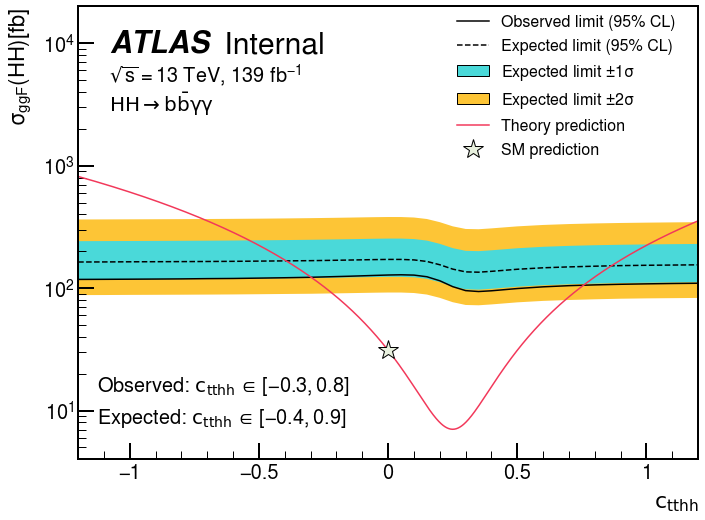

ctthh bbtautau exp [-0.23657917420383176, 0.632802911703564] obs [-0.2864468617355561, 0.6946051395989129]


<Figure size 432x288 with 0 Axes>

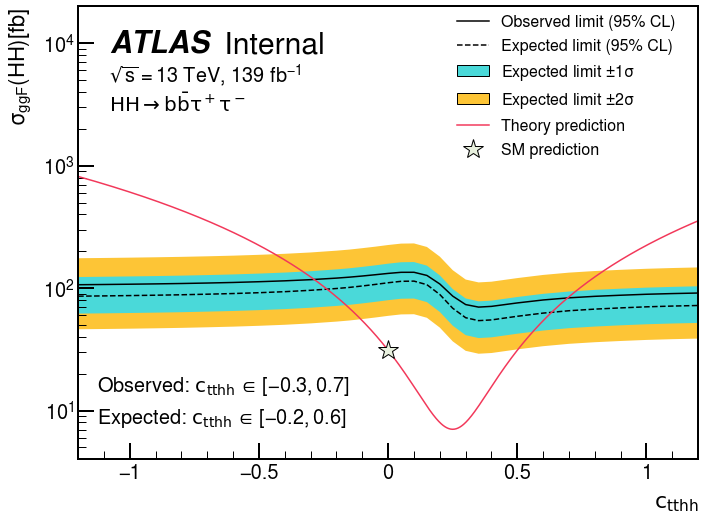

ctthh combined exp [-0.19332219582392415, 0.6059756971347607] obs [-0.19643358683753015, 0.6235477721051302]


<Figure size 432x288 with 0 Axes>

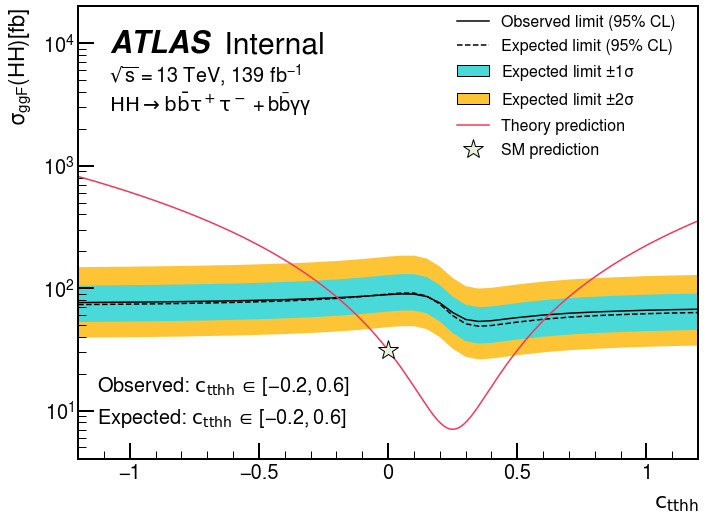

cgghh bbyy exp [-0.5205389850152659, 0.6525955347427358] obs [-0.41239769185423847, 0.5304518899420996]


<Figure size 432x288 with 0 Axes>

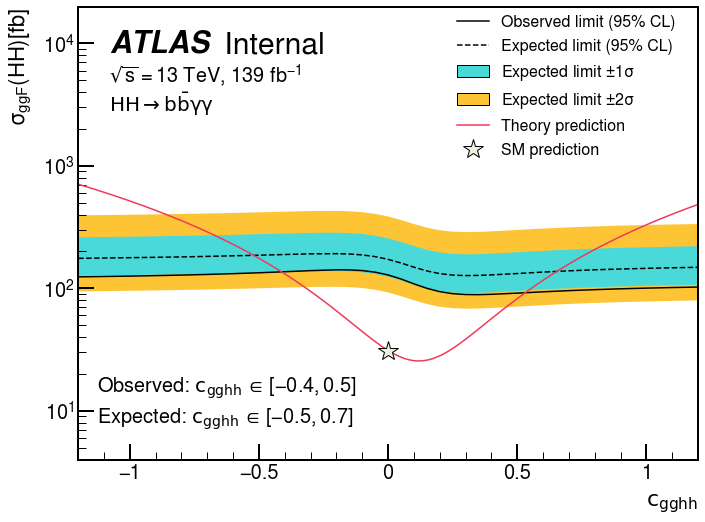

cgghh bbtautau exp [-0.36141135033870747, 0.37182361256051255] obs [-0.4203128495963963, 0.44575968448833464]


<Figure size 432x288 with 0 Axes>

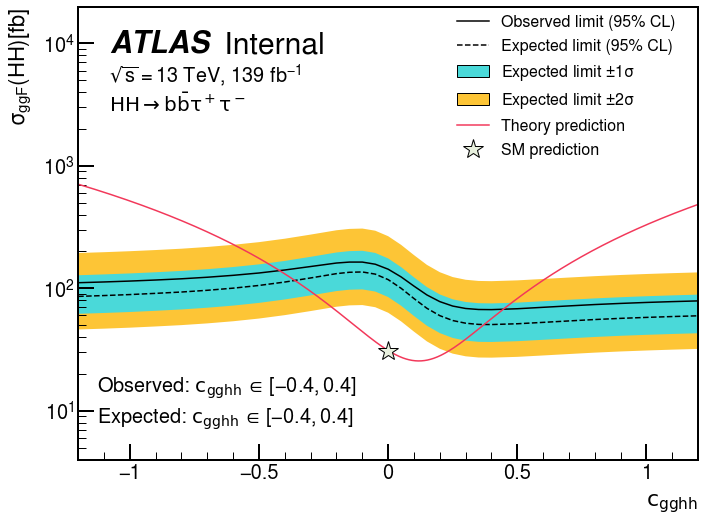

cgghh combined exp [-0.3097459034661957, 0.34539154891270274] obs [-0.3108619668514678, 0.3712971085011329]


<Figure size 432x288 with 0 Axes>

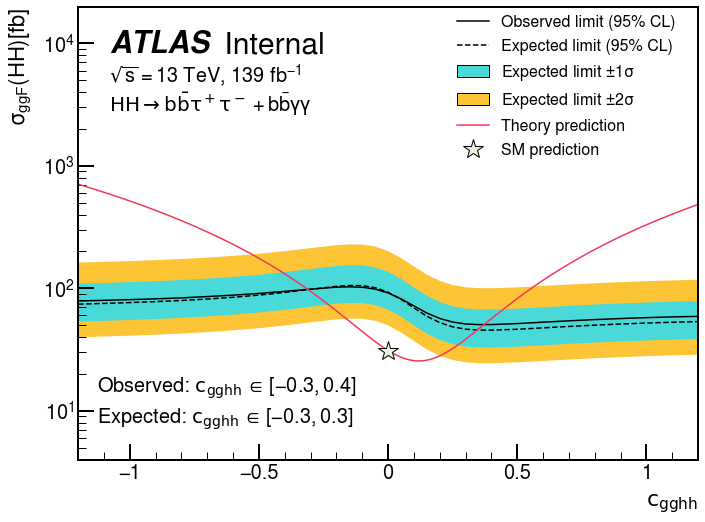

In [14]:
interval = {}
latex_string = {}
for parameter in limit_data:
    for channel in limit_data[parameter]:
        save_path = os.path.join(plot_outdir, f'{channel}_{parameter}_limit_scan.pdf')
        exp_ints, obs_ints = plot_limit_scan(limit_data, parameter, channel, save_as=save_path)
        print(parameter, channel, 'exp', exp_ints, 'obs', obs_ints)
        exp_ints = [float(f"{i:.1f}") for i in exp_ints]
        obs_ints = [float(f"{i:.1f}") for i in obs_ints]
        latex_string[f"{parameter}-{channel}-exp"] = str(exp_ints)
        latex_string[f"{parameter}-{channel}-obs"] = str(obs_ints)
        plt.show()

In [47]:
def format_latex():
    couplings = ['gghh', 'tthh']
    strings = []
    for coupling in couplings:
        strings.append("$c_{" + coupling + "}$ & $" + latex_string[f'c{coupling}-bbyy-obs'] + '$ & $' + latex_string[f'c{coupling}-bbyy-exp'] +\
            '$ & $' + latex_string[f'c{coupling}-bbtautau-obs'] + '$ & $' + latex_string[f'c{coupling}-bbtautau-exp'] +\
            '$ & $' + latex_string[f'c{coupling}-combined-obs'] + '$ & $' + latex_string[f'c{coupling}-combined-exp'] + r'$ \\')
        
    for coupling in couplings:
        for i in ['exp', 'obs']:
            strings.append(r'\newcommand*{\c' + coupling + r'combined' + i + r'left}{\num{' + latex_string[f'c{coupling}-combined-{i}'].split(',')[0].split('[')[-1] + r'}\xspace}')
            strings.append(r'\newcommand*{\c' + coupling + r'combined' + i + r'right}{\num{' + latex_string[f'c{coupling}-combined-{i}'].split(',')[-1].split(']')[0] + r'}\xspace}')
    save_path = os.path.join(plot_outdir, 'scan.tex')
    strings = '\n'.join(strings)
    with open(save_path, "w") as text_file:
        text_file.write(strings)
    print(strings)


$c_{gghh}$ & $[-0.4, 0.5]$ & $[-0.5, 0.7]$ & $[-0.4, 0.4]$ & $[-0.4, 0.4]$ & $[-0.3, 0.4]$ & $[-0.3, 0.3]$ \\
$c_{tthh}$ & $[-0.3, 0.8]$ & $[-0.4, 0.9]$ & $[-0.3, 0.7]$ & $[-0.2, 0.6]$ & $[-0.2, 0.6]$ & $[-0.2, 0.6]$ \\
\newcommand*{\cgghhcombinedexpleft}{\num{-0.3}\xspace}
\newcommand*{\cgghhcombinedexpright}{\num{ 0.3}\xspace}
\newcommand*{\cgghhcombinedobsleft}{\num{-0.3}\xspace}
\newcommand*{\cgghhcombinedobsright}{\num{ 0.4}\xspace}
\newcommand*{\ctthhcombinedexpleft}{\num{-0.2}\xspace}
\newcommand*{\ctthhcombinedexpright}{\num{ 0.6}\xspace}
\newcommand*{\ctthhcombinedobsleft}{\num{-0.2}\xspace}
\newcommand*{\ctthhcombinedobsright}{\num{ 0.6}\xspace}


In [15]:
format_latex()

$c_{gghh}$ & $[-0.4, 0.5]$ & $[-0.5, 0.7]$ & $[-0.4, 0.4]$ & $[-0.4, 0.4]$ & $[-0.3, 0.4]$ & $[-0.3, 0.3]$ \\
$c_{tthh}$ & $[-0.3, 0.8]$ & $[-0.4, 0.9]$ & $[-0.3, 0.7]$ & $[-0.2, 0.6]$ & $[-0.2, 0.6]$ & $[-0.2, 0.6]$ \\
\newcommand*{\cgghhcombinedexpleft}{\num{-0.3}\xspace}
\newcommand*{\cgghhcombinedexpright}{\num{ 0.3}\xspace}
\newcommand*{\cgghhcombinedobsleft}{\num{-0.3}\xspace}
\newcommand*{\cgghhcombinedobsright}{\num{ 0.4}\xspace}
\newcommand*{\ctthhcombinedexpleft}{\num{-0.2}\xspace}
\newcommand*{\ctthhcombinedexpright}{\num{ 0.6}\xspace}
\newcommand*{\ctthhcombinedobsleft}{\num{-0.2}\xspace}
\newcommand*{\ctthhcombinedobsright}{\num{ 0.6}\xspace}


In [16]:
decorrelate_gghh

,mass,0,2,1,-1,-2,obs,inj
cgghh,,,,,,,,
-1.20,0,0.104806,0.228996,0.154036,0.075518,0.056252,0.111359,0
-1.10,0,0.123719,0.270022,0.181658,0.089146,0.066403,0.131097,0
-1.00,0,0.147978,0.322903,0.217273,0.106626,0.079424,0.156400,0
-0.90,0,0.179950,0.392546,0.264200,0.129664,0.096584,0.189575,0
-0.80,0,0.222985,0.486217,0.327353,0.160673,0.119682,0.234102,0
-0.70,0,0.283253,0.617294,0.415758,0.204099,0.152029,0.296732,0
-0.60,0,0.370114,0.806106,0.543152,0.266688,0.198650,0.385274,0
-0.50,0,0.500846,1.089204,0.734321,0.360887,0.268817,0.516665,0
-0.40,0,0.706194,1.534268,1.035216,0.508852,0.379033,0.720423,0


In [75]:
gghh = pd.concat([correlate_gghh[['0', 'obs']], decorrelate_gghh[['0', 'obs']], \
                  (correlate_gghh[['0', 'obs']]/decorrelate_gghh[['0', 'obs']] - 1) * 100], axis=1)
gghh.columns = ['corr exp','corr obs', 'uncorr exp', 'uncorr obs', 'diff exp %', 'diff obs %']
gghh

,corr exp,corr obs,uncorr exp,uncorr obs,diff exp %,diff obs %
cgghh,,,,,,
-1.20,0.105415,0.112312,0.104221,0.110476,1.145876,1.661582
-1.10,0.124345,0.132184,0.122907,0.130020,1.170197,1.663700
-1.00,0.148882,0.157724,0.147001,0.155127,1.279215,1.674221
-0.90,0.181061,0.191215,0.178749,0.188061,1.293223,1.677107
-0.80,0.224384,0.236137,0.221489,0.232245,1.307027,1.675774
-0.70,0.285061,0.299318,0.281325,0.293535,1.327801,1.969976
-0.60,0.372541,0.388664,0.367543,0.382160,1.359785,1.701968
-0.50,0.504313,0.521265,0.497231,0.512471,1.424189,1.716032
-0.40,0.711273,0.727539,0.701003,0.714462,1.465035,1.830355


In [76]:
tthh = pd.concat([correlate_tthh[['0', 'obs']], decorrelate_tthh[['0', 'obs']], \
                  (correlate_tthh[['0', 'obs']]/decorrelate_tthh[['0', 'obs']] - 1) * 100], axis=1)
tthh.columns = ['corr exp','corr obs', 'uncorr exp', 'uncorr obs', 'diff exp %', 'diff obs %']
tthh

,corr exp,corr obs,uncorr exp,uncorr obs,diff exp %,diff obs %
ctthh,,,,,,
-1.20,0.090188,0.093924,0.089914,0.093560,0.305820,0.389899
-1.10,0.104359,0.108591,0.104038,0.108169,0.308111,0.390194
-1.00,0.122135,0.126964,0.121758,0.126470,0.309670,0.390508
-0.90,0.144840,0.150396,0.144387,0.149811,0.313560,0.390867
-0.80,0.174458,0.180910,0.173917,0.180205,0.311178,0.391310
-0.70,0.214164,0.221680,0.213611,0.220816,0.259037,0.391503
-0.60,0.269046,0.277783,0.268181,0.276699,0.322448,0.391768
-0.50,0.347586,0.358043,0.346464,0.356640,0.323710,0.393346
-0.40,0.465187,0.477738,0.463682,0.475860,0.324481,0.394666
